In [723]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [724]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [725]:
# This generates a random hypothesis
def generate_random_concept_h():
    p = round(random.uniform(1, 100), 5)
    q = round(random.uniform(1, 100), 5)
    r = round(random.uniform(1, 100), 5)
    s = round(random.uniform(1, 100), 5)
    return [ min(p, q), max(p, q), min(r, s), max(r, s) ]

In [726]:
def generate_dataset(n):
    dataset=[]
    while(n>0):
        x = round(random.uniform(1, 100), 5)
        y = round(random.uniform(1, 100), 5)
        dataset.append([x,y])
        n-=1
    return dataset

In [727]:
def predicate(x, y, h_parameters):
    p = h_parameters[0]
    q = h_parameters[1]
    r = h_parameters[2]
    s = h_parameters[3]
    if p <= x and x <= q and r <= y and y <= s:
        return 1
    return 0

In [728]:
def labeling_function(dataset, h_parameters):
    labeled_dataset=[]
    for data_instance in dataset:
        x = data_instance[0]
        y = data_instance[1]
        fxy = predicate(x, y, h_parameters)
        labeled_dataset.append([x, y, fxy])
    return labeled_dataset

In [729]:
def generate_hypothesis(labeled_dataset):
    p_pred=100
    q_pred=0
    r_pred=100
    s_pred=0
    for dataset_instance in labeled_dataset:
        if dataset_instance[2]==1:
            p_pred = min(p_pred,dataset_instance[0])
            q_pred = max(q_pred,dataset_instance[0])
            r_pred = min(r_pred,dataset_instance[1])
            s_pred = max(s_pred,dataset_instance[1])
    return [p_pred, q_pred, r_pred, s_pred]

In [730]:
def calculate_emperical_error(hypothesis_parameter, labeled_dataset):
    error=0
    predicted_label_dataset = labeling_function(labeled_dataset, hypothesis_parameter)
    size = len(labeled_dataset)
    for i in range(size):
        if predicted_label_dataset[i][2] != labeled_dataset[i][2]:
            error+=1
    return error
    

In [731]:
random.seed(110)
random_concept_h_parameter = generate_random_concept_h()
print("Random Concept h:")
print("p = ", random_concept_h_parameter[0])
print("q = ", random_concept_h_parameter[1])
print("r = ", random_concept_h_parameter[2])
print("s = ", random_concept_h_parameter[3])

Random Concept h:
p =  39.41544
q =  93.49193
r =  25.52858
s =  82.34248


In [732]:
dataset100 = generate_dataset(100)
# print(dataset100)

In [733]:
labeled_dataset100 = labeling_function(dataset100, random_concept_h_parameter)
print(labeled_dataset100)
count0=0
count1=0
for data_instance in labeled_dataset100:
    if data_instance[2]==1:
        count1+=1
    else:
        count0+=1
print(count0)
print(count1)

[[48.72407, 28.0888, 1], [54.66003, 8.42417, 0], [42.25789, 32.28904, 1], [4.96712, 81.7457, 0], [91.32788, 15.8937, 0], [63.59651, 53.33684, 1], [43.08241, 59.41881, 1], [66.45313, 28.48597, 1], [36.90896, 51.21734, 0], [99.36171, 93.14876, 0], [77.93835, 46.33124, 1], [90.95985, 97.91007, 0], [88.47173, 20.23971, 0], [41.66202, 23.53914, 0], [45.69561, 85.57466, 0], [49.99102, 33.61313, 1], [17.30724, 14.87942, 0], [82.4609, 95.24196, 0], [88.99155, 1.38579, 0], [27.48195, 14.92814, 0], [46.89286, 20.96407, 0], [49.24624, 45.66495, 1], [63.51143, 51.94218, 1], [50.71694, 5.44421, 0], [94.31904, 43.28169, 0], [87.13727, 33.04322, 1], [9.96568, 99.13091, 0], [49.80796, 17.73358, 0], [96.37339, 92.87923, 0], [11.9429, 95.12408, 0], [13.97347, 13.77569, 0], [15.73945, 87.72163, 0], [61.01107, 56.01237, 1], [70.2019, 30.13314, 1], [7.04503, 8.85288, 0], [24.46615, 58.98989, 0], [8.26469, 5.43166, 0], [20.92938, 2.06971, 0], [6.58382, 14.5195, 0], [12.91657, 34.00185, 0], [85.14202, 67.114

In [734]:
hypothesis_h1_parameter = generate_hypothesis(labeled_dataset100)
print("Hypothesis h1:")
print("predicted p= ", hypothesis_h1_parameter[0])
print("predicted q = ", hypothesis_h1_parameter[1])
print("predicted r = ", hypothesis_h1_parameter[2])
print("predicted s = ", hypothesis_h1_parameter[3])
h1_labeled_dataset100 = labeling_function(dataset100, hypothesis_h1_parameter)

Hypothesis h1:
predicted p=  42.25789
predicted q =  90.49548
predicted r =  27.16308
predicted s =  82.23595


In [735]:
emperical_error100= calculate_emperical_error(random_concept_h_parameter, h1_labeled_dataset100)
print(emperical_error100)

0


From true hypothesis :


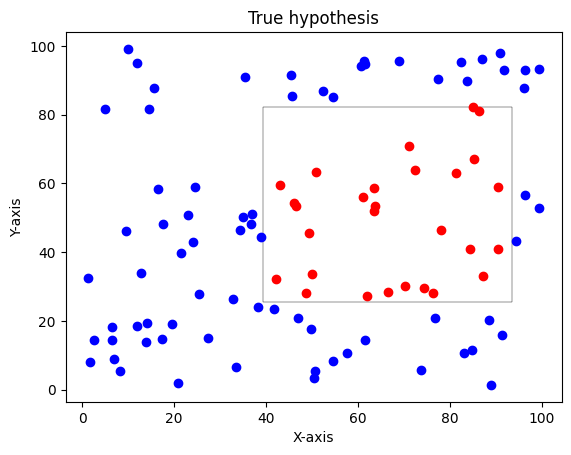

From hypothesis h1:


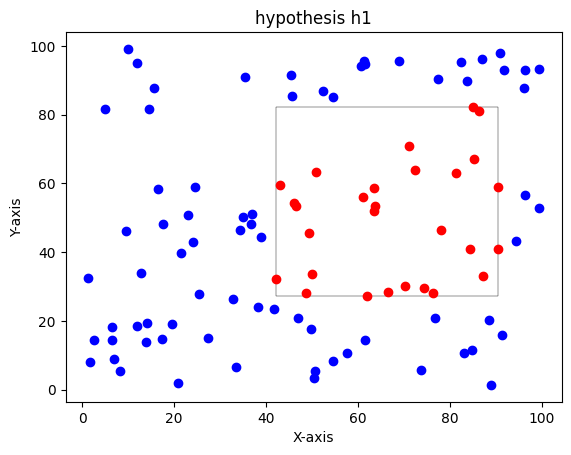

In [736]:
print("From true hypothesis :")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((random_concept_h_parameter[0], random_concept_h_parameter[2]), random_concept_h_parameter[1]-random_concept_h_parameter[0], random_concept_h_parameter[3]-random_concept_h_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in labeled_dataset100:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('True hypothesis')
plt.show()

print("From hypothesis h1:")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in h1_labeled_dataset100:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('hypothesis h1')
plt.show()

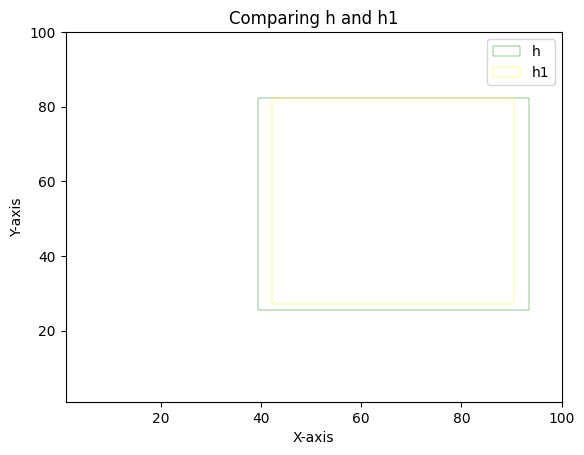

In [737]:
# Comparision between h and h1
fig, ax = plt.subplots()
# True hypothesis
rectangle_h = patches.Rectangle((random_concept_h_parameter[0], random_concept_h_parameter[2]), random_concept_h_parameter[1]-random_concept_h_parameter[0], random_concept_h_parameter[3]-random_concept_h_parameter[2], linewidth=0.3, edgecolor='green', facecolor='none', label='h')
ax.add_patch(rectangle_h)
rectangle_h1 = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.3, edgecolor='yellow', facecolor='none', label='h1')
ax.add_patch(rectangle_h1)

ax.set_xlim(1, 100)
ax.set_ylim(1, 100)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparing h and h1')
plt.legend()
plt.show()

In [738]:
dataset200 = dataset100 + generate_dataset(100)
h1_labeled_dataset200 = labeling_function(dataset200, hypothesis_h1_parameter)
emperical_error200= calculate_emperical_error(random_concept_h_parameter, h1_labeled_dataset200)
print(emperical_error200)

5


In [739]:
labeled_dataset200 = labeling_function(dataset200, random_concept_h_parameter)
hypothesis_h2_parameter = generate_hypothesis(labeled_dataset200)
print("Hypothesis h2:")
print("predicted p= ", hypothesis_h2_parameter[0])
print("predicted q = ", hypothesis_h2_parameter[1])
print("predicted r = ", hypothesis_h2_parameter[2])
print("predicted s = ", hypothesis_h2_parameter[3])
h2_labeled_dataset200 = labeling_function(dataset200, hypothesis_h2_parameter)
emperical_error200 = calculate_emperical_error(hypothesis_h2_parameter, h2_labeled_dataset200)
print(emperical_error200)

Hypothesis h2:
predicted p=  39.84924
predicted q =  92.59509
predicted r =  26.73445
predicted s =  82.23595
0


From true hypothesis :


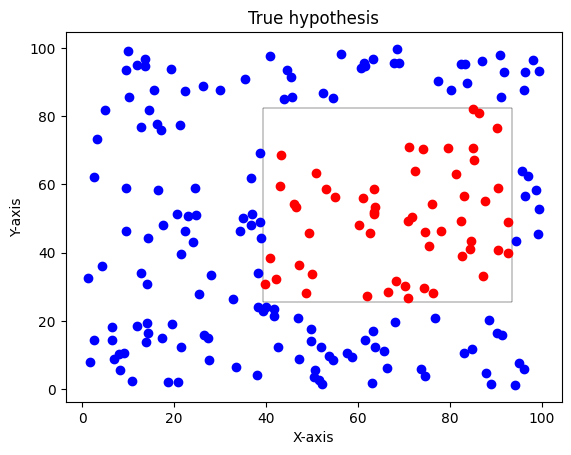

From hypothesis h1:


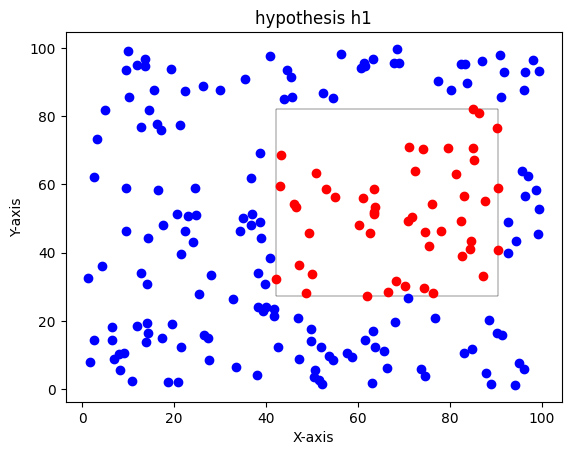

From hypothesis h2:


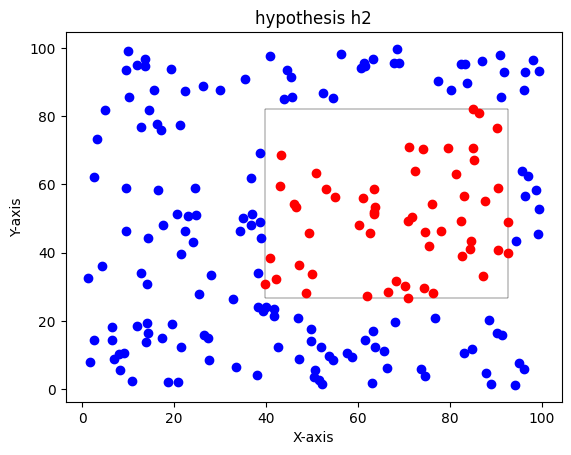

In [740]:
print("From true hypothesis :")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((random_concept_h_parameter[0], random_concept_h_parameter[2]), random_concept_h_parameter[1]-random_concept_h_parameter[0], random_concept_h_parameter[3]-random_concept_h_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in labeled_dataset200:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('True hypothesis')
plt.show()

print("From hypothesis h1:")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in h1_labeled_dataset200:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('hypothesis h1')
plt.show()

print("From hypothesis h2:")
fig, ax = plt.subplots()
rectangle = patches.Rectangle((hypothesis_h2_parameter[0], hypothesis_h2_parameter[2]), hypothesis_h2_parameter[1]-hypothesis_h2_parameter[0], hypothesis_h2_parameter[3]-hypothesis_h2_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)
for dataset_instance in h2_labeled_dataset200:
    if dataset_instance[2] == 1:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='red')
    else:
        plt.scatter(dataset_instance[0], dataset_instance[1], color='blue')
        
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('hypothesis h2')
plt.show()

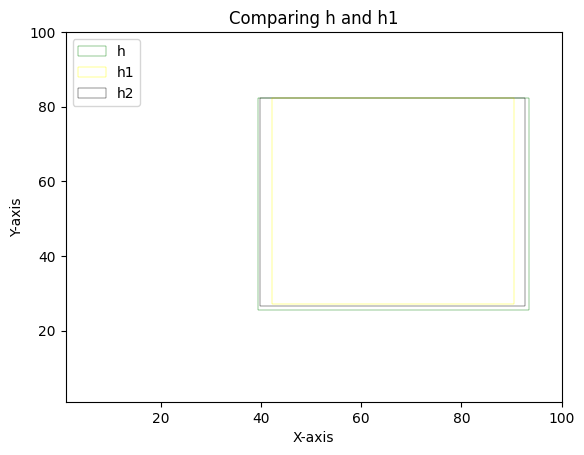

In [741]:
# Comparision between h and h1
fig, ax = plt.subplots()
# True hypothesis
rectangle_h = patches.Rectangle((random_concept_h_parameter[0], random_concept_h_parameter[2]), random_concept_h_parameter[1]-random_concept_h_parameter[0], random_concept_h_parameter[3]-random_concept_h_parameter[2], linewidth=0.3, edgecolor='green', facecolor='none', label='h')
ax.add_patch(rectangle_h)
rectangle_h1 = patches.Rectangle((hypothesis_h1_parameter[0], hypothesis_h1_parameter[2]), hypothesis_h1_parameter[1]-hypothesis_h1_parameter[0], hypothesis_h1_parameter[3]-hypothesis_h1_parameter[2], linewidth=0.3, edgecolor='yellow', facecolor='none', label='h1')
ax.add_patch(rectangle_h1)
rectangle_h2 = patches.Rectangle((hypothesis_h2_parameter[0], hypothesis_h2_parameter[2]), hypothesis_h2_parameter[1]-hypothesis_h2_parameter[0], hypothesis_h2_parameter[3]-hypothesis_h2_parameter[2], linewidth=0.3, edgecolor='black', facecolor='none', label='h2')
ax.add_patch(rectangle_h2)

ax.set_xlim(1, 100)
ax.set_ylim(1, 100)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparing h and h1')
plt.legend()
plt.show()